# Training Dataset

In [ ]:
#Import Libraries

In [53]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read Data

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Desktop\AI\train.csv",encoding="latin")

In [ ]:
# Copy the Data

In [3]:
df=data.copy()

In [ ]:
#cheaking headings column name of dataset

In [4]:
df.head(3)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18


In [ ]:
#checking all the column values and rows values of a particular column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
#to replace missing (NaN) values in the "text" column of dataset with empty string('')

In [6]:
df['text'].fillna('',inplace=True)

In [ ]:
#after fill missing values check all column values are same 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27481 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
#find shape of data to know the how many columns and rows in dataset.

In [8]:
df.shape

(27481, 10)

In [ ]:
# select only the "text" and "sentiment" columns from the dataset

In [9]:
df=df[['text','sentiment']]

In [ ]:
# it is used to retrive the unique values present in the "sentiment" column of the dataset

In [10]:
df["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
#This "func" function takes one argument, sentiment, which is a string indicating a sentiment. 
#It returns a numerical value based on the sentiment provided. 
#the function operate that: If the sentiment is 'positive', the function returns 0.
                           #If the sentiment is 'negative', the function returns 1.
                           #For any other sentiment (neither 'positive' nor 'negative'), the function returns 2.

In [11]:
def func(sentiment):
    if sentiment =='positive':
        return 0;
    elif sentiment =='negative':
        return 1;
    else:
        return 2;

In [ ]:
#after applying the "func" function to the 'sentiment' column. Assuming df is a Dataset and 'sentiment' is one of its columns 
#the line df['sentiment'] = df['sentiment'].apply(func) transforms the values in the 'sentiment' column according to the logic
#defined in the "func" function.

In [12]:
df['sentiment'] = df['sentiment'].apply(func)

In [ ]:
#to convert text data from a Dataset into numpy arrays x_train and y_train for training a model, where x_train contains the 
#text data and y_train contains the corresponding sentiment labels.

In [13]:
x_train = np.array(df['text'].tolist())
y_train = np.array(df['sentiment'].tolist())

In [ ]:
#x_train which is a numpy array containing the text data after being extracted from the Dataset. 

In [14]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [ ]:
#y_train numpy array. This array contains the sentiment labels extracted from the Dataset.

In [15]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [ ]:
#to_categorical function which is commonly used in machine learning tasks for one-hot encoding categorical variables. 
#This function is typically provided by libraries such as Keras or TensorFlow.

#to_categorical function will convert each label into a vector of length 3, where the index corresponding to the label is 
#set to 1 and all other indices are set to 0.

In [16]:
y_train = to_categorical(y_train, 3)

In [ ]:
#After using one-hot encoding using to_categorical function, the y_train array would contain the one-hot encoded
#representations of the sentiment labels. 

In [17]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
#This line imports the Tokenizer class from Keras and then initializes a Tokenizer object with the parameter num_words=20000

#The num_words parameter specifies the maximum number of words to keep, based on word frequency.

In [18]:
tokenizer = Tokenizer(num_words=20000)

In [ ]:
#This line of code fits the Tokenizer to the text data x_train. It updates the internal vocabulary of the Tokenizer based on 
#the words present in the x_train data.

In [19]:
tokenizer.fit_on_texts(x_train)

In [ ]:
#This will give the number of unique words in text data that the tokenizer has observe.

In [20]:
len(tokenizer.word_index)

26598

In [ ]:
#to convert the text data in x_train into sequences of integers using the texts_to_sequences() method provided by the Tokenizer
#object. This method replaces each word in the text data with its corresponding integer index from the word index built by the
#Tokenizer.

In [21]:
x_train = tokenizer.texts_to_sequences(x_train)

In [ ]:
#The pad_sequences function is a utility provided by Keras for preprocessing sequence data.

In [22]:
from keras.utils import pad_sequences

In [ ]:
#to use the pad_sequences function to pad sequences in x_train to a maximum length of 35, with padding added at the end of
#sequences ('post' padding).

In [23]:
x_train = pad_sequences(x_train, padding='post', maxlen=35)  # Set maxlen to 35

In [ ]:
#print the first sequence in x_train after padding.

In [24]:
x_train[0]

array([    1,   165,    19, 10456,    73,     1,   150,    48,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
#o get the shape of the x_train array after padding,  use the .shape

In [25]:
x_train.shape

(27481, 35)

In [ ]:
#Embedding Layer (Embedding):

#The Embedding layer is the first layer in the model.
#input_dim=20000 specifies the size of the vocabulary the maximum integer index that can be used to represent words.
#output_dim=5 specifies the dimensionality of the embedding space. Each word will be represented as a vector of length 5 in this
#space.
#input_length=35 specifies the length of input sequences each input sequence will be padded/truncated to have a length  
# of 35 tokens.

#SimpleRNN Layer (SimpleRNN):

#The SimpleRNN layer with 32 units (or neurons) is added after the embedding layer.
#return_sequences=False indicates that only the output of the last timestep will be returned by this RNN layer.
#able for many classification tasks where we are only interested in the final output of the sequence.

#Dense Output Layer (Dense):

#The Dense layer with 3 units is added after the SimpleRNN layer.
#activation='softmax' specifies the activation function for the output layer. Softmax activation is commonly used for 
#multi-class
#classification tasks, as it produces a probability distribution over the classes.

In [26]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 5)             100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1216      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 101315 (395.76 KB)
Trainable params: 101315 (395.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#This line of code compiles the model you've defined using Keras.

#optimizer='adam': This specifies the optimizer to be used during training. In this case, it's Adam, which is a popular 
#optimization algorithm known for its efficiency and effectiveness in training deep neural networks.

#loss='categorical_crossentropy': This specifies the loss function to be used during training. For multi-class classification 
#tasks with one-hot encoded labels, categorical crossentropy is commonly used.

#metrics=['accuracy']: This specifies the evaluation metric(s) to be used during training and testing. 

#After compiling the model with these settings, it's ready to be trained on your data using the fit() method.

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#x_train: This is the input data, consisting of padded sequences of integers representing text data.

#y_train: This is the target data, which is the one-hot encoded labels corresponding to the sentiment of each input sequence.

#epochs=20: This specifies the number of epochs for which the model will be trained.

In [28]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20


859/859 [==============================] - 16s 15ms/step - loss: 0.9912 - accuracy: 0.5021
Epoch 2/20
859/859 [==============================] - 13s 15ms/step - loss: 0.7512 - accuracy: 0.6797
Epoch 3/20
859/859 [==============================] - 13s 15ms/step - loss: 0.5902 - accuracy: 0.7695
Epoch 4/20
859/859 [==============================] - 13s 15ms/step - loss: 0.4875 - accuracy: 0.8190
Epoch 5/20
859/859 [==============================] - 13s 15ms/step - loss: 0.4072 - accuracy: 0.8542
Epoch 6/20
859/859 [==============================] - 13s 15ms/step - loss: 0.3455 - accuracy: 0.8798
Epoch 7/20
859/859 [==============================] - 13s 15ms/step - loss: 0.2986 - accuracy: 0.8988
Epoch 8/20
859/859 [==============================] - 13s 15ms/step - loss: 0.2634 - accuracy: 0.9116
Epoch 9/20
859/859 [==============================] - 13s 15ms/step - loss: 0.2345 - accuracy: 0.9218
Epoch 10/20
859/859 [==============================] - 13s 15ms/step - loss: 0.2

In [ ]:
#import matplotlib.pyplot as plt: This imports the Matplotlib library, which is a plotting library for Python.

#plt.plot(history.history['accuracy']): This plots the training accuracy over epochs. history.history['accuracy'] accesses 
#the training accuracy values stored in the history object returned by the fit() method.

#plt.show(): This displays the plot.

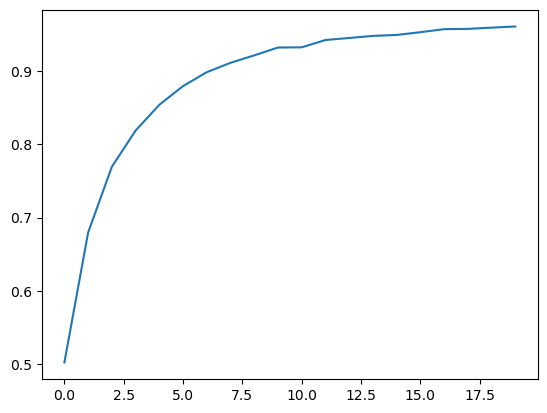

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
#preprocesses it using the tokenizer and padding techniques that were used during training, and then makes predictions using
#the trained model. Based on the predicted class index it prints out the sentiment label.

In [57]:
text = "I`d have responded, if I were going"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 39ms/step
Neutral Sentiment


# Testing Dataset

In [32]:
data1=pd.read_csv(r"C:\Users\Dell\Downloads\test (1).csv",encoding="latin")

In [33]:
data1.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [35]:
data1.shape

(4815, 9)

In [36]:
data1=data1[['text','sentiment']]

In [37]:
data1["sentiment"].unique()

array(['neutral', 'positive', 'negative', nan], dtype=object)

In [38]:
def func(sentiment):
    if sentiment =='positive':
        return 0;
    elif sentiment =='negative':
        return 1;
    else:
        return 2;

In [39]:
data1['sentiment'] = data1['sentiment'].apply(func)

In [40]:
x_test = np.array(data1['text'].tolist())
y_test = np.array(data1['sentiment'].tolist())

In [41]:
x_test

array(['Last session of the day  http://twitpic.com/67ezh',
       ' Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).',
       'Recession hit Veronique Branquinho, she has to quit her company, such a shame!',
       ..., 'nan', 'nan', 'nan'], dtype='<U148')

In [42]:
y_test

array([2, 0, 1, ..., 2, 2, 2])

In [43]:
y_test = to_categorical(y_test, 3)

In [44]:
tokenizer = Tokenizer(num_words=20000)

In [45]:
tokenizer.fit_on_texts(x_test)

In [46]:
len(tokenizer.word_index)

7302

In [47]:
x_test = tokenizer.texts_to_sequences(x_test)

In [48]:
x_test = pad_sequences(x_test, padding='post', maxlen=35)  

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(x_test, y_test, epochs=20)

Epoch 1/20
151/151 [==============================] - 5s 16ms/step - loss: 0.9773 - accuracy: 0.5169
Epoch 2/20
151/151 [==============================] - 2s 16ms/step - loss: 0.8089 - accuracy: 0.5479
Epoch 3/20
151/151 [==============================] - 2s 15ms/step - loss: 0.7999 - accuracy: 0.5551
Epoch 4/20
151/151 [==============================] - 3s 17ms/step - loss: 0.7699 - accuracy: 0.5948
Epoch 5/20
151/151 [==============================] - 2s 15ms/step - loss: 0.7225 - accuracy: 0.6328
Epoch 6/20
151/151 [==============================] - 2s 15ms/step - loss: 0.6721 - accuracy: 0.6683
Epoch 7/20
151/151 [==============================] - 2s 15ms/step - loss: 0.5871 - accuracy: 0.7317
Epoch 8/20
151/151 [==============================] - 2s 15ms/step - loss: 0.5054 - accuracy: 0.7909
Epoch 9/20
151/151 [==============================] - 2s 15ms/step - loss: 0.4098 - accuracy: 0.8420
Epoch 10/20
151/151 [==============================] - 2s 15ms/step - loss: 0.3142 - accura

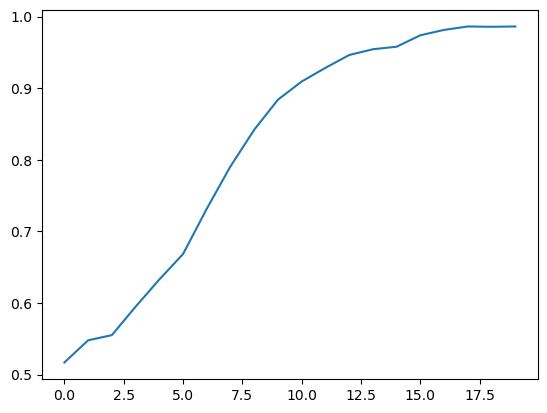

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.show()


In [52]:
text = "Last session of the day http://twitpic.com/67ezh"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 309ms/step
Neutral Sentiment
